In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [152]:
df=pd.read_csv(r"C:\Users\Gaurav Kumar\Desktop\DATA TRAINED\Internship\glass.csv")

In [153]:
df

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   Ri      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [155]:
df.isnull().sum().sum()

0

In [156]:
df.describe()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [157]:
# here the mean for Silicon is on the higher side whereas rest of the features mean are of lesser values

In [158]:
df['type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

In [159]:
#Type 1 and Type 2 are more than the 65% of total data. so the dataset is unbalanced dataset

In [160]:
df=df.drop('Id',axis=1)

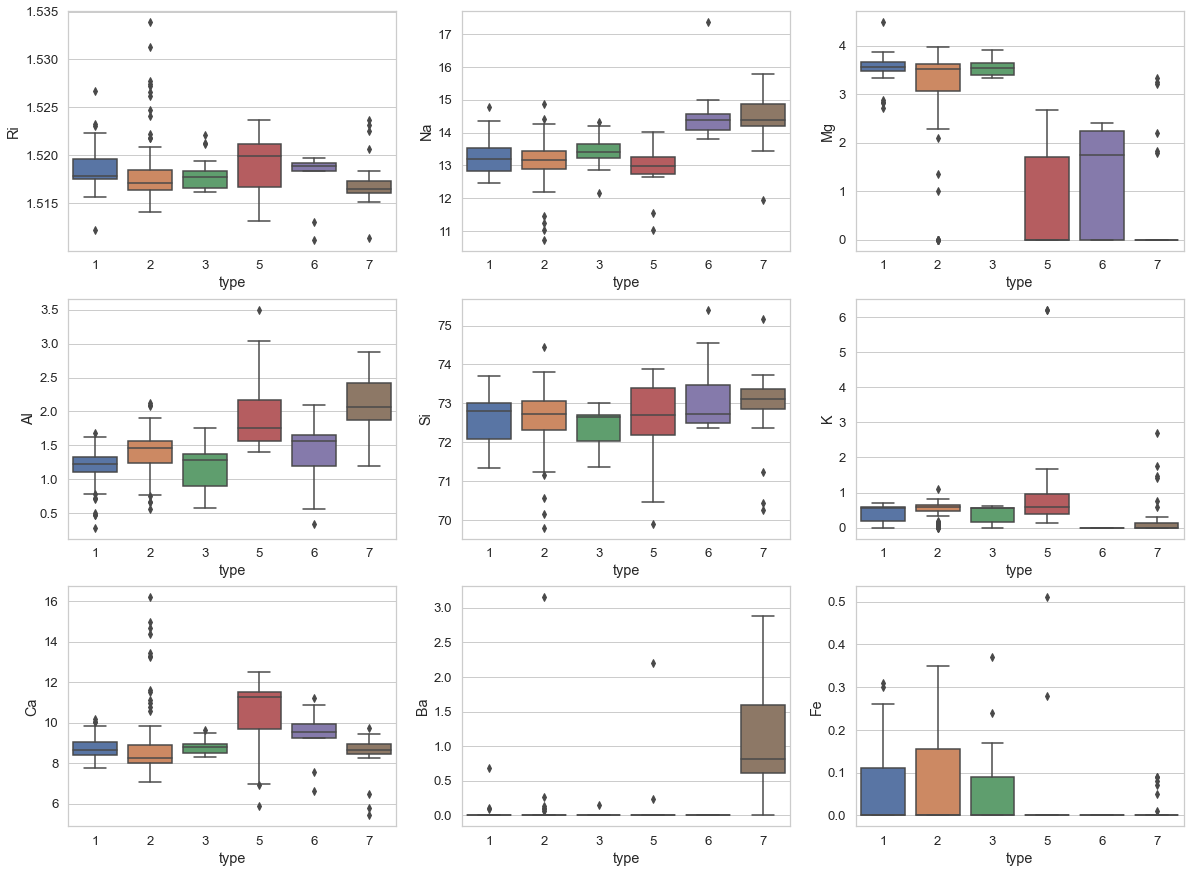

In [161]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='type', y='Ri', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='type', y='Fe', data=df)
plt.show()

# The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

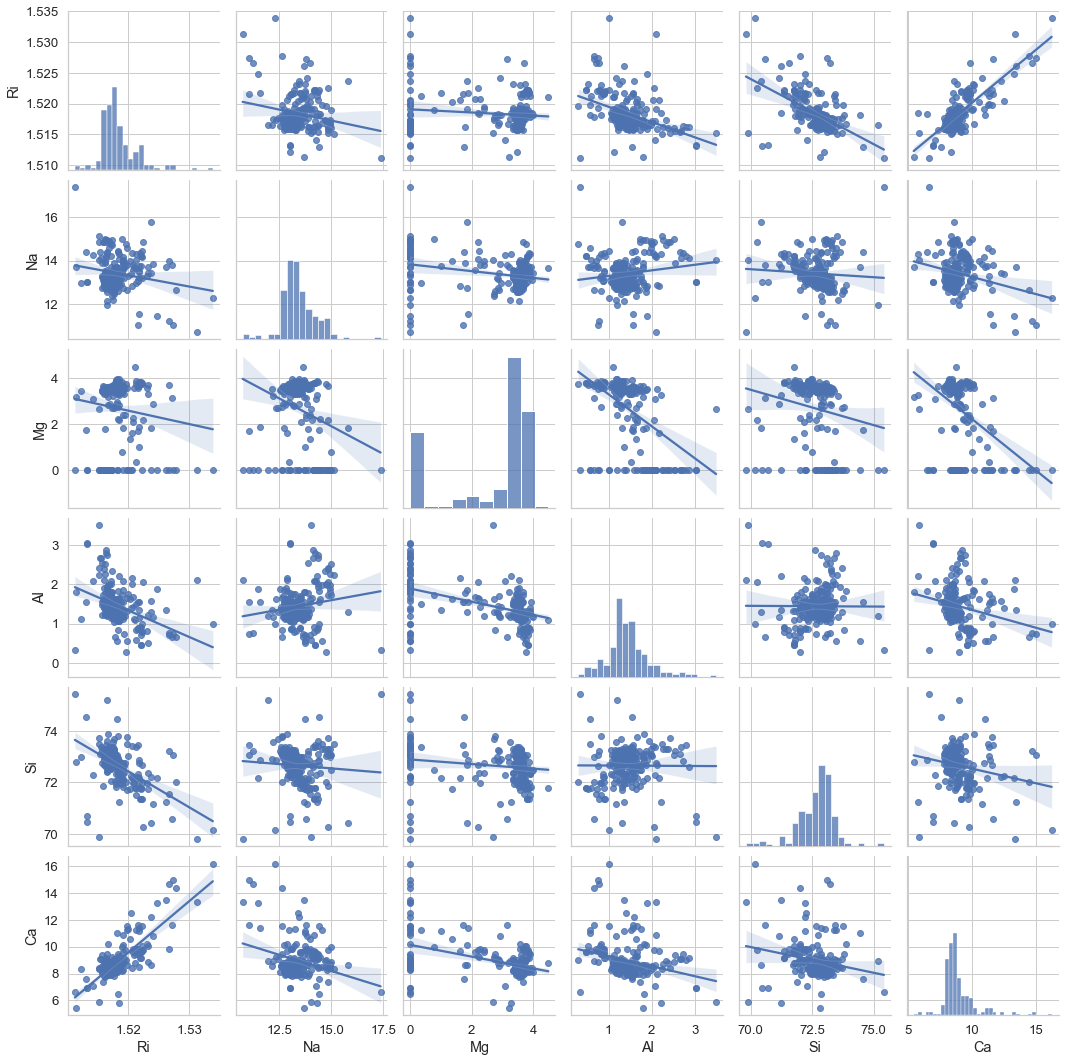

In [162]:
sns.pairplot(df[['Ri','Na','Mg','Al','Si','Ca']], kind='reg')

In [163]:
#On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

# lets examin the correlation

In [164]:
correlation = df.corr()

<AxesSubplot:>

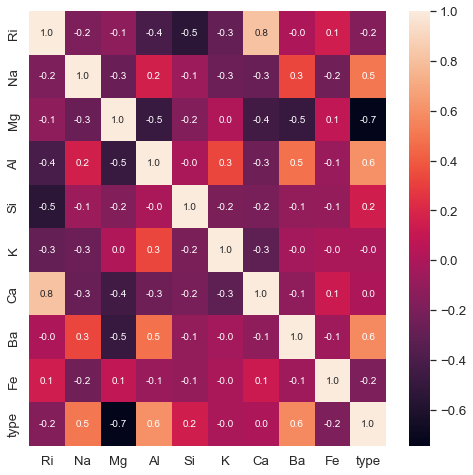

In [165]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True,annot_kws={'size':10})


In [166]:
# there is a high positive correlation betweeen R and Ca, and Si and RI  negative

# Feature Selection using PCA

In [167]:
from sklearn.decomposition import PCA
from sklearn import metrics

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


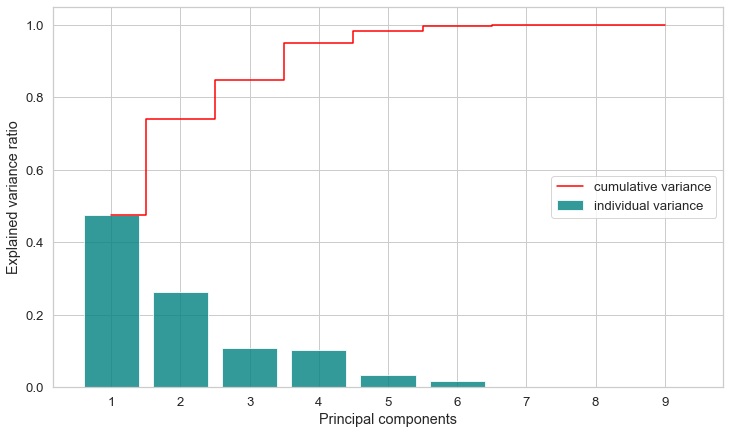

In [168]:
# Performing PCA
X_var = df[['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [169]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

# Model Development

In [170]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = df["type"].values

In [171]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=20)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Testing models

In [176]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

In [177]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)



[0.26720932 0.28063192 0.13513765 0.19074966 0.12627145]
[0.3497003  0.29732912 0.04570017 0.18414774 0.12312267]


In [178]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],
             ['Decision Tree',sc2],
             ['Random Forest',sc3]],
             columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.584615
1,Decision Tree,0.600000
2,Random Forest,0.646154


In [179]:
# Random forest has the highest accurcy score 

Model Performance

Text(199.86, 0.5, 'predicted label')

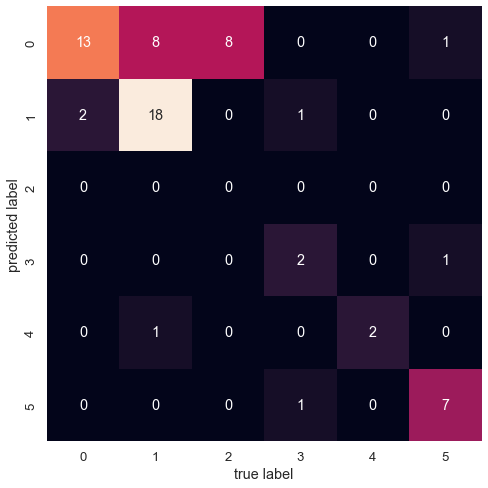

In [181]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.87      0.58        15
           2       0.86      0.67      0.75        27
           3       0.00      0.00      0.00         8
           5       0.67      0.50      0.57         4
           6       0.67      1.00      0.80         2
           7       0.88      0.78      0.82         9

    accuracy                           0.65        65
   macro avg       0.58      0.64      0.59        65
weighted avg       0.64      0.65      0.62        65



C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
